In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
base_dir = '/content/gdrive/My Drive/Dataset/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/content/gdrive/My Drive/Dataset/rockpaperscissors/train')

['scissors', 'paper', 'rock']

In [5]:
os.listdir('/content/gdrive/My Drive/Dataset/rockpaperscissors/val')

['paper', 'rock', 'scissors']

In [0]:
train_paper_dir = os.path.join(train_dir,'paper')
train_rock_dir = os.path.join(train_dir,'rock')
train_scissors_dir = os.path.join(train_dir,'scissors')

validation_paper_dir = os.path.join(validation_dir,'paper')
validation_rock_dir = os.path.join(validation_dir,'rock')
validation_scissors_dir = os.path.join(validation_dir,'scissors')

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

test_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
                    )

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(validation_dir,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical'
)

Found 1531 images belonging to 3 classes.
Found 657 images belonging to 3 classes.


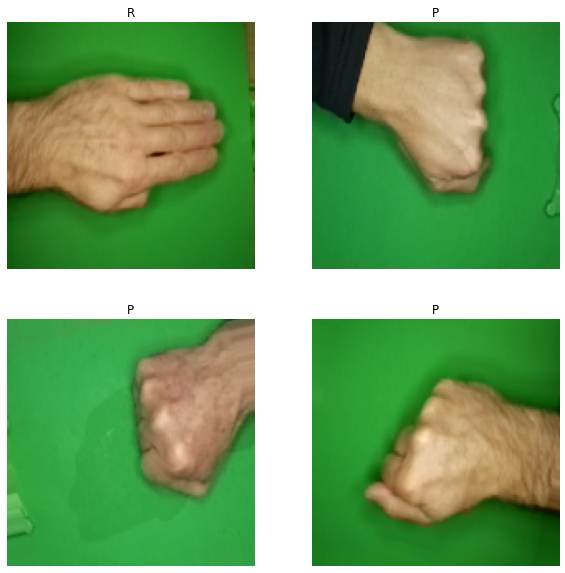

In [14]:
CLASS_NAMES = ['rock','paper','scissor']
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(4):
      ax = plt.subplot(2,2,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[np.argmax(label_batch[n])][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=test_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 22s - loss: 0.6595 - accuracy: 0.3300 - val_loss: 0.6248 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 21s - loss: 0.6249 - accuracy: 0.3700 - val_loss: 0.5944 - val_accuracy: 0.4500
Epoch 3/20
25/25 - 18s - loss: 0.5618 - accuracy: 0.5700 - val_loss: 0.5271 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 17s - loss: 0.4980 - accuracy: 0.6200 - val_loss: 0.3886 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 17s - loss: 0.3325 - accuracy: 0.7900 - val_loss: 0.2652 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 16s - loss: 0.2539 - accuracy: 0.8700 - val_loss: 0.3390 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 15s - loss: 0.2499 - accuracy: 0.8600 - val_loss: 0.2990 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 14s - loss: 0.2633 - accuracy: 0.8300 - val_loss: 0.2562 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 15s - loss: 0.1965 - accuracy: 0.8900 - val_loss: 0.7048 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 12s - loss: 0.2728 - accuracy: 0.8600 - val_loss: 0.2489 - val_accuracy: 0.8500
Epoch 11/

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
01dM3ewPIsnBICu1.png
rock


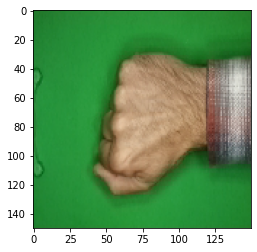

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  class_ = np.argmax(classes) 
  if class_ == 0:
    print('paper')
  elif class_ == 1:
    print('rock')
  else:
    print('scissors')

In [16]:
model.evaluate(x=test_generator)

165/165 [==============================] - 62s 377ms/step - loss: 0.1694 - accuracy: 0.9041


[0.1694115847349167, 0.9041095972061157]